In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [5]:
def houghLine(image):
    ''' Basic Hough line transform that builds the accumulator array
    Input : image : edge image (canny)
    Output : accumulator : the accumulator of hough space
             thetas : values of theta (-90 : 90)
             rs : values of radius (-max distance : max distance)
    '''
        #Get image dimensions
    # y for rows and x for columns 
    Ny = image.shape[0]
    Nx = image.shape[1]

    #Max diatance is diagonal one 
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))
    # initialize parameter space rs, thetas
 # Theta in range from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90, 90))
    #Range of radius
    rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)
    accumulator = np.zeros((2 * Maxdist, len(thetas)))
    for y in range(Ny):
        for x in range(Nx):
            # Check if it is an edge pixel
            #  NB: y -> rows , x -> columns
            if image[y,x] > 0:
                for k in range(len(thetas)):
                            # Calculate space parameter
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
                       
                 # Update the accumulator
                 # N.B: r has value -max to max
                 # map r to its idx 0 : 2*max
                    accumulator[int(r) + Maxdist,k] += 1
    return accumulator, thetas, rs


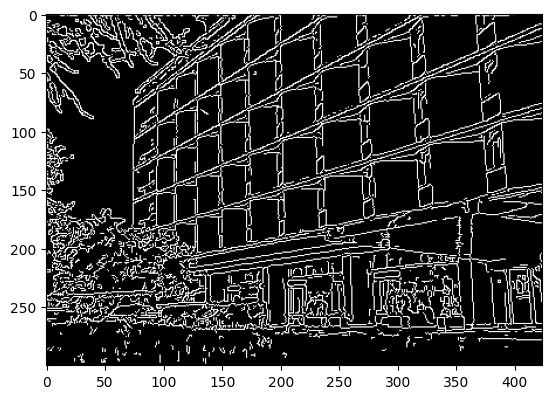

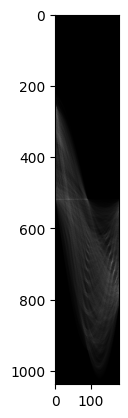

In [10]:
# image = np.zeros((150,150))

image=cv.imread('Images/i1.png',cv.IMREAD_GRAYSCALE)
img_canny = cv.Canny(image,100,150)
# image[75, 75] = 1
accumulator, thetas, rhos = houghLine(img_canny)
plt.figure('Original Image')
plt.imshow(img_canny)
plt.set_cmap('gray')
plt.figure('Hough Space')
plt.imshow(accumulator)
plt.set_cmap('gray')
plt.show()

In [11]:
idx = np.argmax(accumulator)
rho = int(rhos[int(idx / accumulator.shape[1])])
theta = thetas[int(idx % accumulator.shape[1])]
print("rho={0:.0f}, theta={1:.0f}".format(rho, np.rad2deg(theta)))

rho=176, theta=67


In [12]:
from skimage.transform import hough_line_peaks

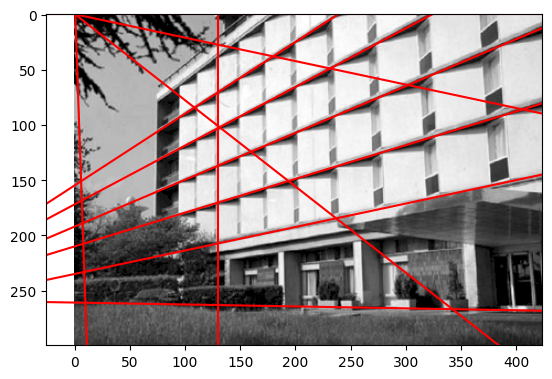

In [13]:
plt.imshow(image)
for _, angle, dist in zip(*hough_line_peaks(accumulator, thetas, rhos)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2),color="red")